# dataset 확인

In [1]:
data_name = 'pwb_tue_blue'
phase = 'train'
mask_ver = 'pwb_front_v39_1'

In [2]:
import os
import sys
from glob import glob
from addict import Dict
from PIL import Image
import numpy as np

In [3]:
if './src' not in sys.path:
    sys.path.append('./src')

from src.datagen_aug import LipGanDS

In [4]:
from glob import glob
train_images = glob(os.path.join(data_name, 'train/*/*_yes.jpg'))
val_images = glob(os.path.join(data_name, 'val/*/*_yes.jpg'))
len(train_images), len(val_images)

(81784, 800)

In [5]:
args = Dict(
    batch_size = 1,
    num_workers = 1,
    fps = 30,
    mel_step_size = 108, #81,
    mel_ps = 80,
    img_size = 352,
    mask_ver = mask_ver,
    num_ips = 2,
    mask_img_trsf_ver = 0,
    mel_trsf_ver = -1,
    mel_norm_ver = -1,
    lr = 1, # dummy_lr
)
args.train_images = train_images
args.val_images = val_images,
ds = LipGanDS(args, phase)


mel_step_size:108, mel_ps:80
mask_img_trsf_ver:  0


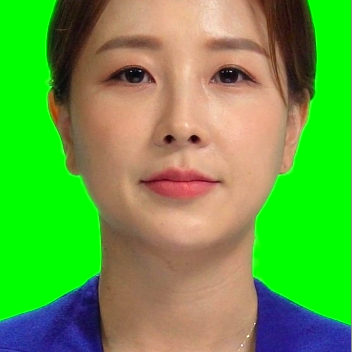

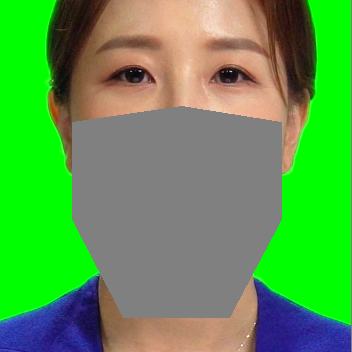

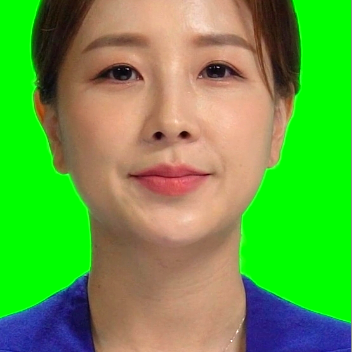

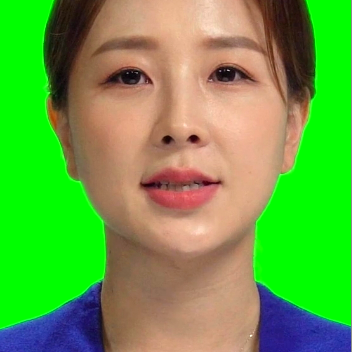

(96, 108)


In [6]:
def numpy_to_img(np_image):
    np_image = np_image[:,:,::-1]
    np_image = (np_image + 1.0) *255.0 /2.0
    np_image = np.clip(0, 255, np_image)
    img = Image.fromarray(np_image.astype(np.uint8))
    return img


idx = np.random.randint(0, len(ds)-1)
img_gt, mel, ips = ds[idx]
display(numpy_to_img(img_gt))
display(numpy_to_img(ips[:,:,:3]))
display(numpy_to_img(ips[:,:,3:6]))
display(numpy_to_img(ips[:,:,6:9]))

print(mel.shape)